## **Introduction**

In this notebook, we will discover and explore data of the top 4 stocks in the stock market viz Reliance, TCS, HDFC Bank, and Infosys.

We will use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib.

We will also look at a few ways of analyzing the risk of a stock, based on its previous performance history and try to predict future stock prices through a **Long Short Term Memory (LSTM) method!**

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of Reliance Industries Limited using LSTM)

***   

## **Getting the Data**
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo.

In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
stock_list = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS']

stocklist = ['RELIANCE', 'TCS', 'HDFCBANK', 'INFY']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock,tech  in zip(stock_list,stocklist):
    globals()[tech] = yf.download(stock, start, end)

company_list = [RELIANCE,TCS,HDFCBANK, INFY]
company_name = ['RELIANCE', 'TCS', 'HDFCBANK', 'INFY']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-04,1368.900024,1385.900024,1362.000000,1378.349976,1378.349976,5712345,INFY
2023-08-07,1387.900024,1395.000000,1377.000000,1393.000000,1393.000000,3729093,INFY
2023-08-08,1392.849976,1393.550049,1384.400024,1390.199951,1390.199951,4161877,INFY
2023-08-09,1384.000000,1396.000000,1382.500000,1394.400024,1394.400024,4090828,INFY
2023-08-10,1391.599976,1395.800049,1385.599976,1389.099976,1389.099976,3873025,INFY
2023-08-11,1392.000000,1396.849976,1367.050049,1371.849976,1371.849976,5783517,INFY
2023-08-14,1371.849976,1395.000000,1365.599976,1393.550049,1393.550049,4304135,INFY
2023-08-16,1410.800049,1419.949951,1405.400024,1418.500000,1418.500000,7735313,INFY
2023-08-17,1420.000000,1420.000000,1406.000000,1411.550049,1411.550049,5618346,INFY


**Observation:** Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records as the market is closed on weekends.



Now since we have our data, let's perform some basic **EDA** and check our data.

*Exploratory Data Analysis (EDA) is an essential step in data analysis that involves the initial examination and exploration of a dataset to understand its main characteristics, identify patterns, spot anomalies, and generate hypotheses. EDA helps analysts and data scientists gain insights into the data before conducting more formal statistical analyses or building predictive models*

In [7]:
#Dimension of our dataset

df.shape

#This would tell us about the number of rows and columns in our dataset.


(988, 7)

In [4]:
#Let's check if the data has any missing values:

df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [5]:
#Clearly there is no missing data in our dataframe so we can proceed for further steps.

In [6]:
# Since we are working with Stocks data, it would be better if we don't remove the outliers as these would significantly affect the performance of our model as the outliers are common in these types of data.

In [8]:
#We will now look at the basic statistics of the different columns that we have in our dataset with respect to the different companies.

company_stats = df.groupby('company_name')[['Open', 'High', 'Low', 'Close']].describe()
company_stats.head()

Open                                                     \
              count         mean         std          min          25%   
company_name                                                             
HDFCBANK      247.0  1594.940687   78.990928  1378.800049  1567.849976   
INFY          247.0  1438.894530  113.788009  1225.949951  1342.775024   
RELIANCE      247.0  2489.380157  120.030220  2215.000000  2398.900024   
TCS           247.0  3275.622669  125.544402  2959.850098  3192.500000   

                                                      High               ...  \
                      50%          75%          max  count         mean  ...   
company_name                                                             ...   
HDFCBANK      1615.900024  1650.000000  1723.449951  247.0  1607.549593  ...   
INFY          1446.349976  1530.525024  1656.199951  247.0  1449.652429  ...   
RELIANCE      2496.550049  2572.000000  2830.000000  247.0  2509.584605  ...   
TCS           3276.000000  3365.000000  3549.000000  247.0  3300.398573  ...   

                      Low               Close                           \
                      75%          max  count         mean         std   
company_name                                                             
HDFCBANK      1638.300049  1713.800049  247.0  1595.181988   77.762647   
INFY          1516.274963  1652.300049  247.0  1437.492918  113.476341   
RELIANCE      2549.449951  2797.000000  247.0  2487.911344  122.947255   
TCS           3344.149902  3527.000000  247.0  3275.471252  126.956710   

                                                                               
                      min          25%          50%          75%          max  
company_name                                                                   
HDFCBANK      1382.349976  1567.875000  1614.150024  1649.275024  1728.199951  
INFY          1223.400024  1344.525024  1449.500000  1525.525024  1657.099976  
RELIANCE      2201.250000  2384.549927  2496.449951  2571.150024  2841.850098  
TCS           2982.050049  3197.350098  3271.949951  3370.075073  3558.050049  

[4 rows x 32 columns]

## **1. What was the change in price of the stock overtime?**


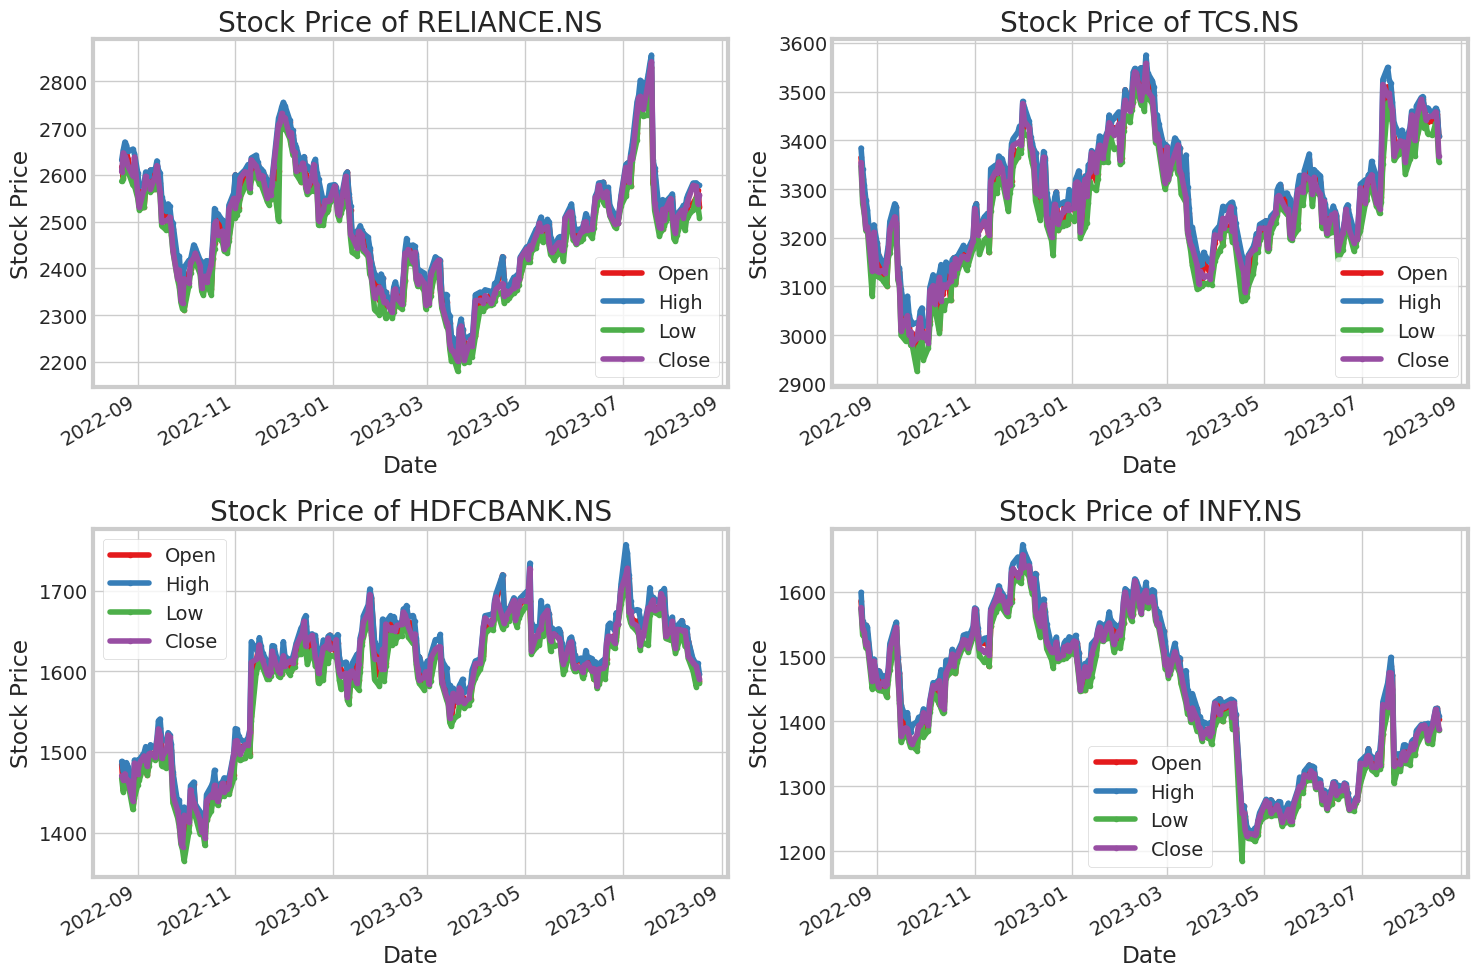

In [14]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

colors = sns.color_palette('Set1', n_colors=4)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Open'].plot(label='Open', color=colors[0], marker='o', markersize=3)
    company['High'].plot(label='High', color=colors[1], marker='o', markersize=3)
    company['Low'].plot(label='Low', color=colors[2], marker='o', markersize=3)
    company['Close'].plot(label='Close', color=colors[3], marker='o', markersize=3)

    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.title(f"Stock Price of {stock_list[i - 1]}")

plt.tight_layout()

## **Closing Price**
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

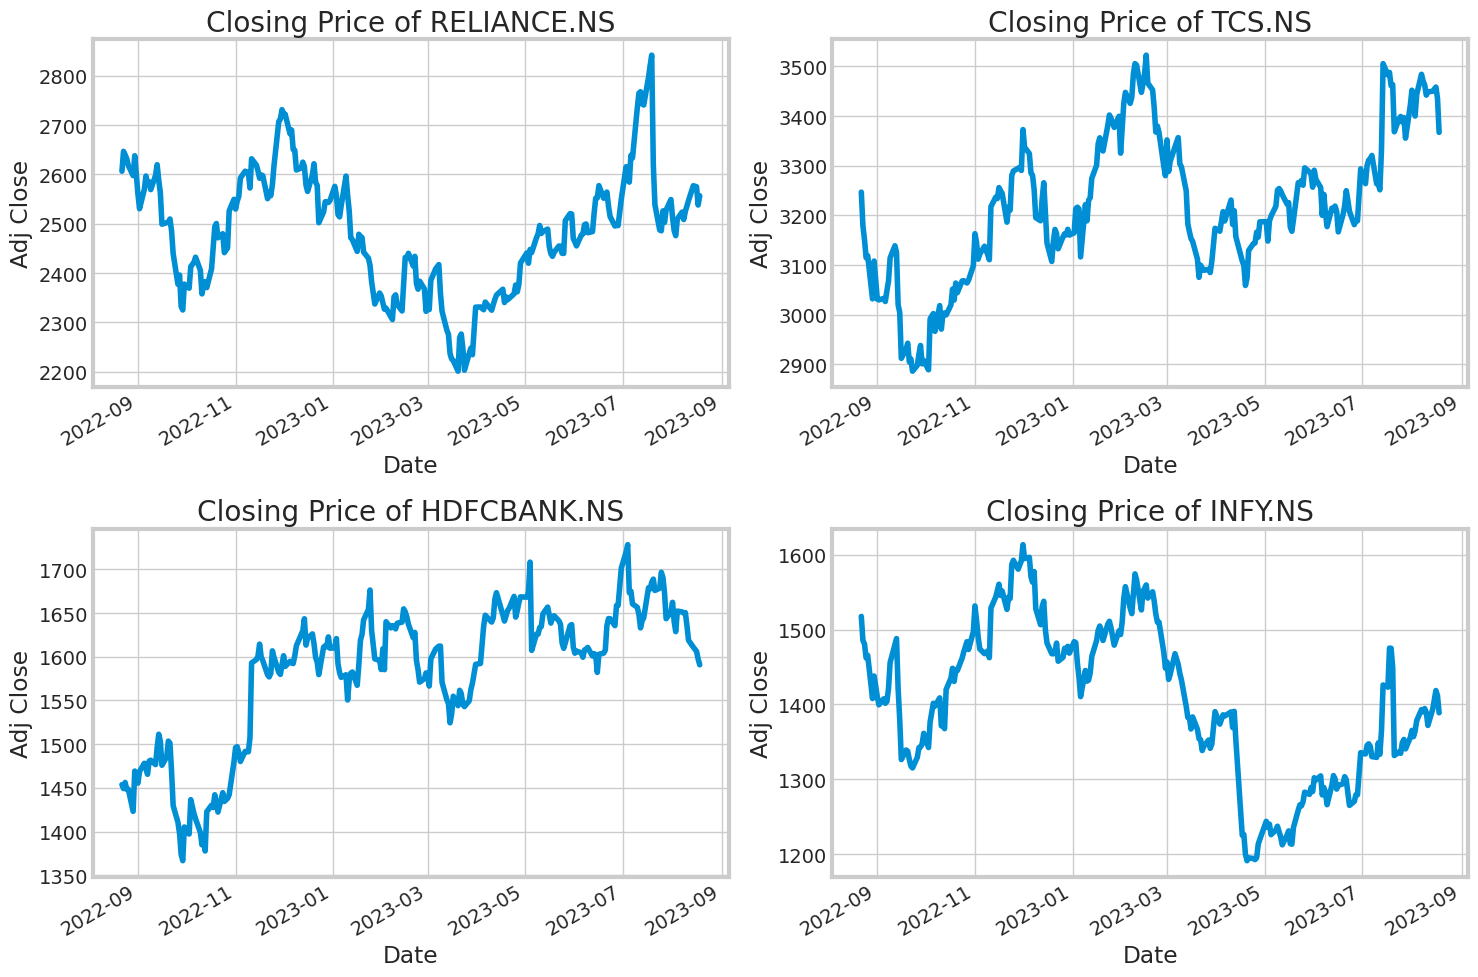

In [15]:
# Let's see a historical view of the closing price only.
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {stock_list[i - 1]}")

plt.tight_layout()

## **Volume of Sales**
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

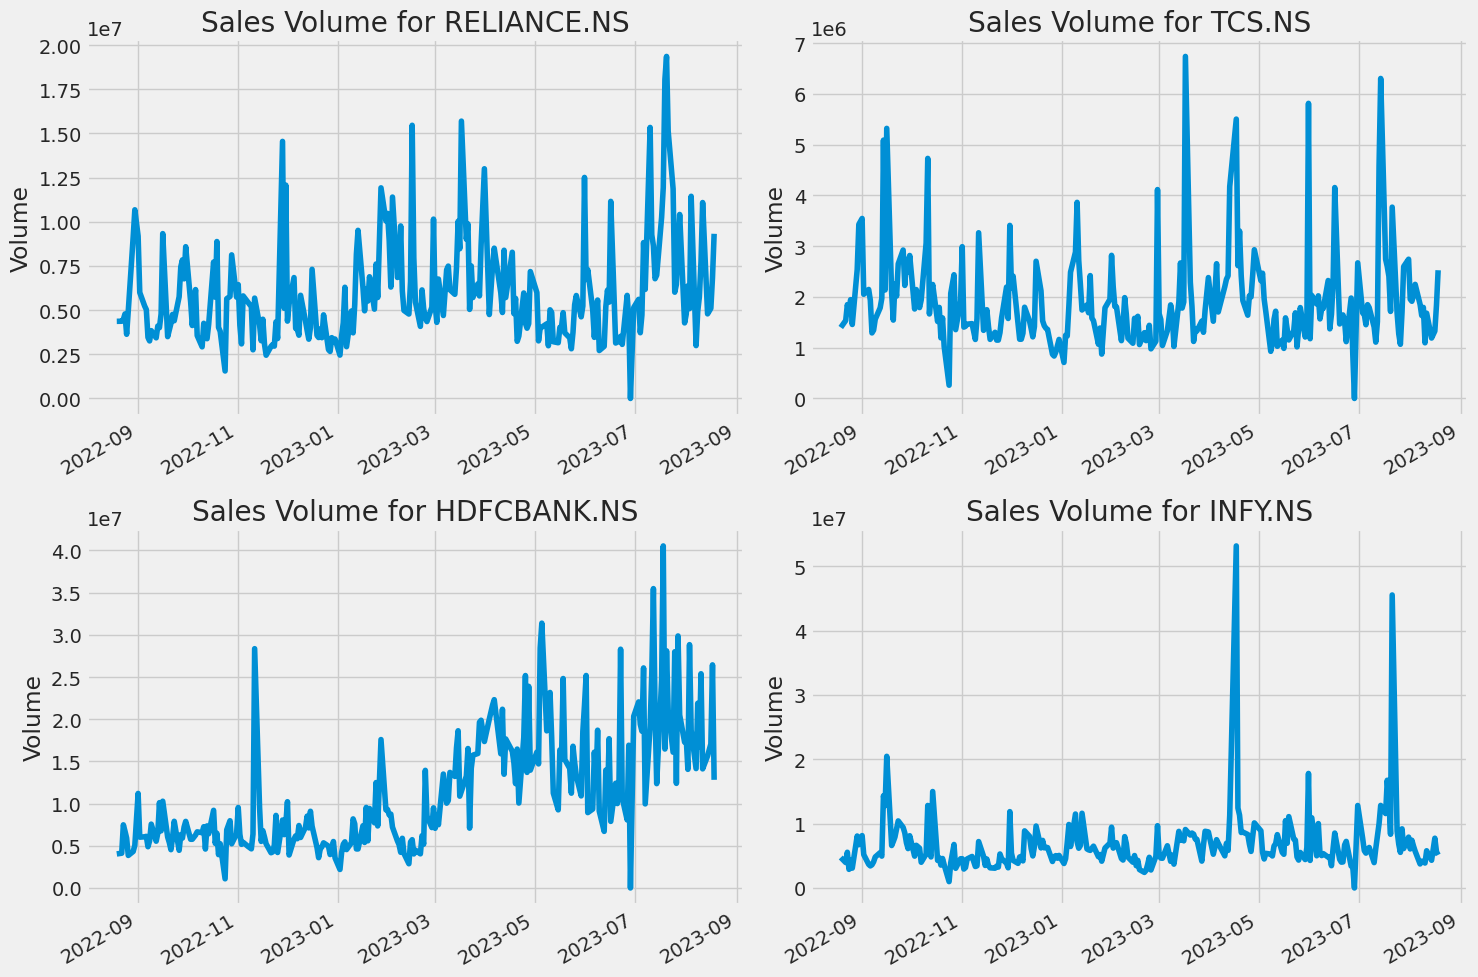

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_list[i - 1]}")

plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.


## **2. What was the moving average of the various stocks?**
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

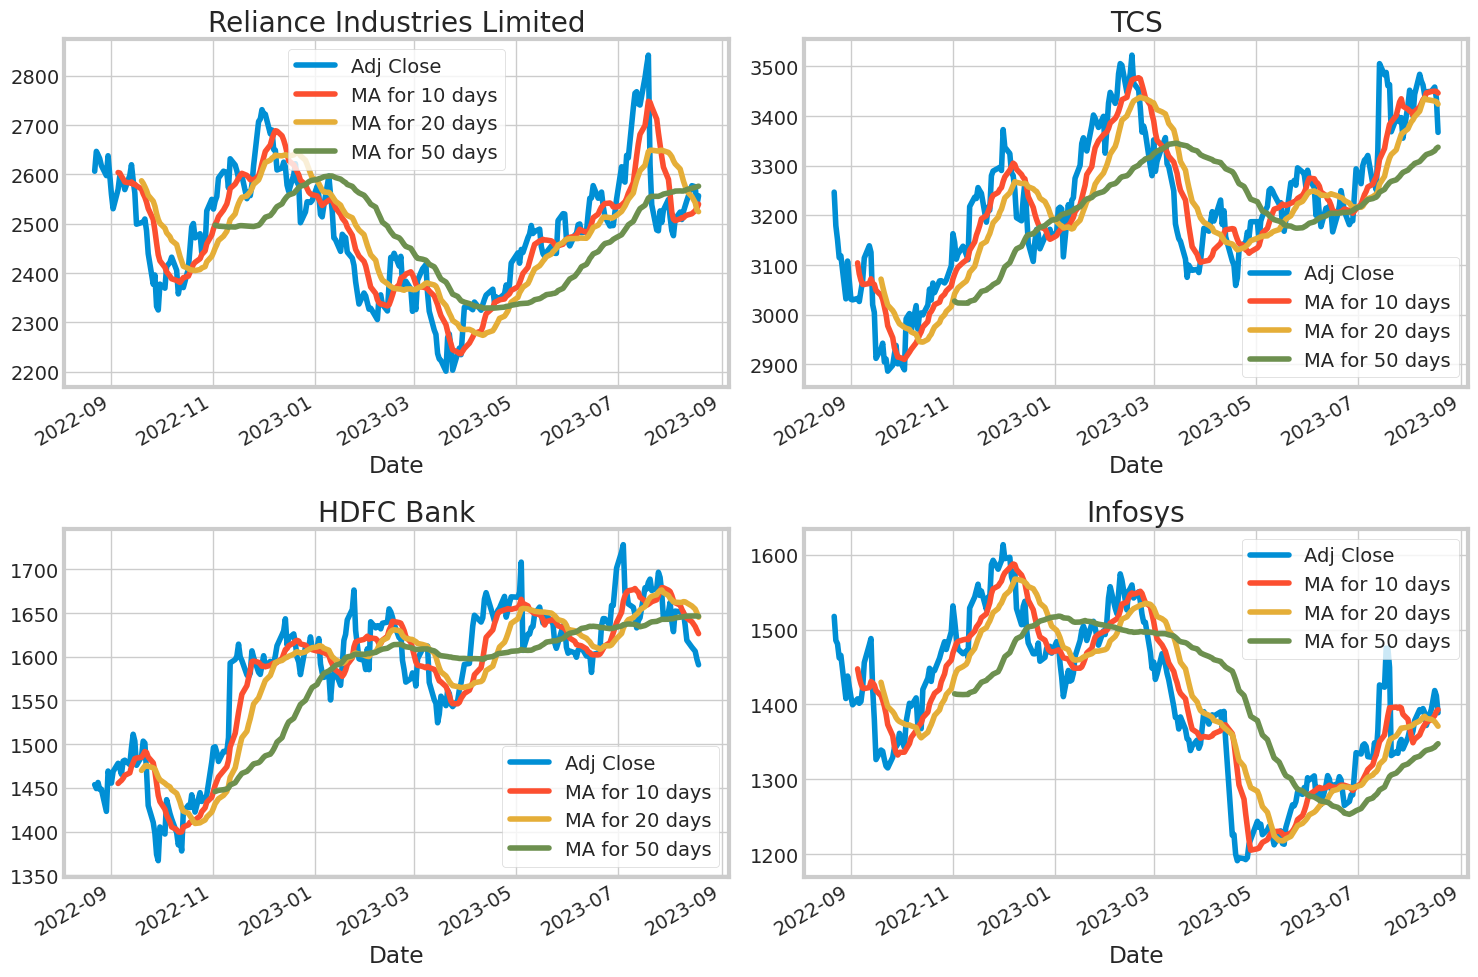

In [16]:
#We will be doing Moving average over days.
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

RELIANCE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Reliance Industries Limited')

TCS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('TCS')

HDFCBANK[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('HDFC Bank')

INFY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Infosys')

fig.tight_layout()

**Observation:** We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

## **3. What was the daily return of the stock on average?**
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for different stocks.

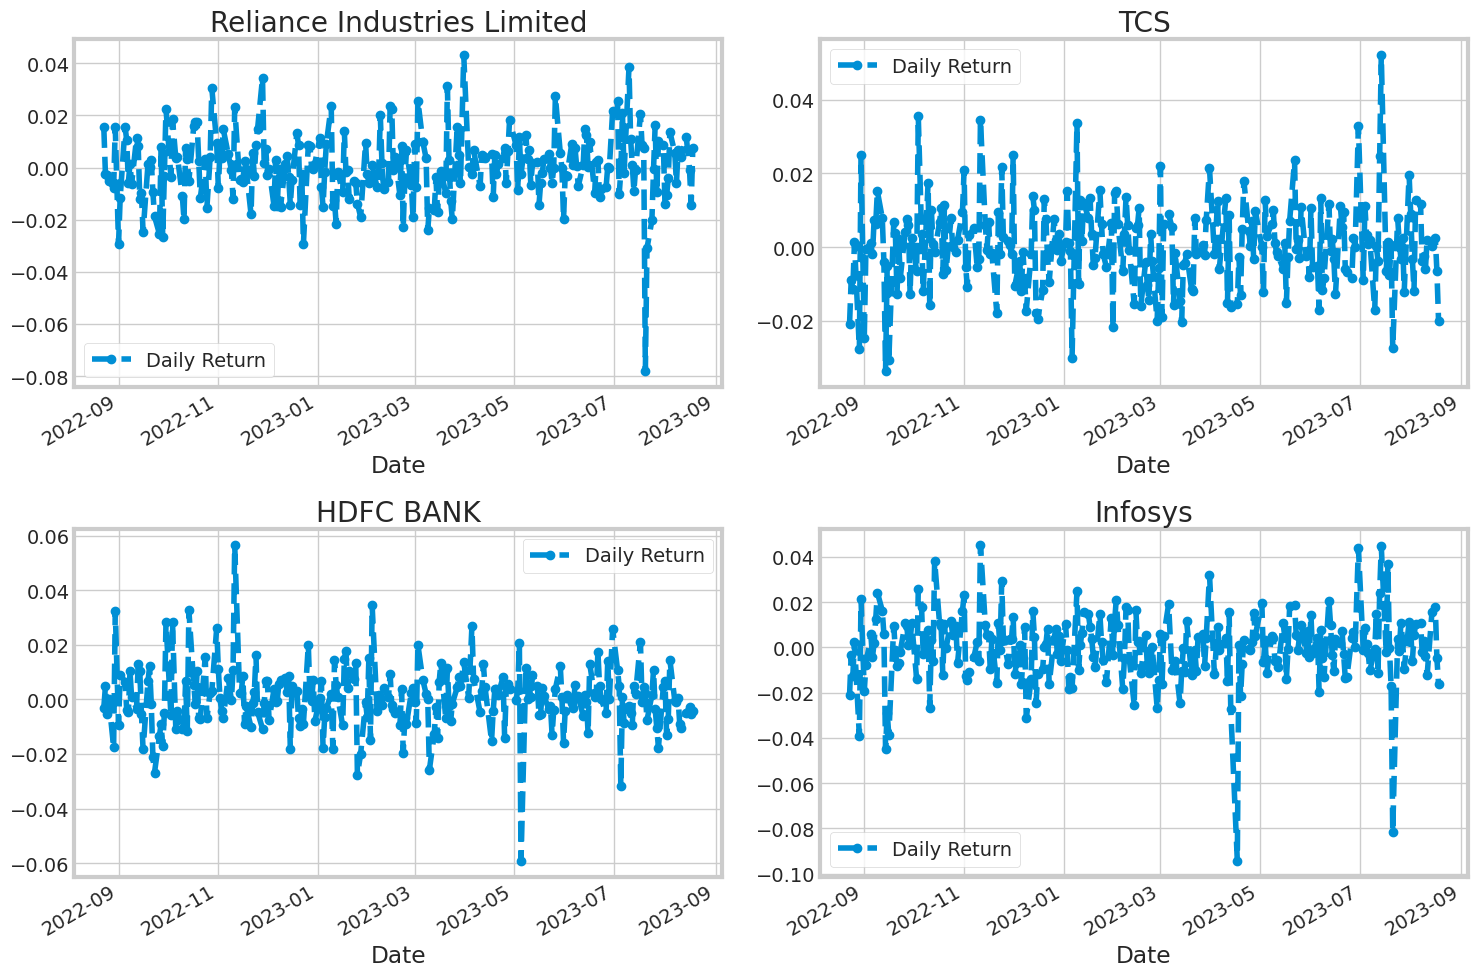

In [17]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

RELIANCE['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Reliance Industries Limited')

TCS['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('TCS')

HDFCBANK['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('HDFC BANK')

INFY['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Infosys')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a **histogram**.

*A histogram is a graphical representation of the distribution of data. It's a way to visualize the frequency or count of values within specific intervals or "bins" of a dataset. Histograms are commonly used in statistics and data analysis to understand the underlying distribution of a numerical variable.*


We'll use seaborn to create both a histogram and kde plot on the same figure.

<ipython-input-18-7a625e2b63db>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(company['Daily Return'],shade=True,color='blue')
<ipython-input-18-7a625e2b63db>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(company['Daily Return'],shade=True,color='blue')
<ipython-input-18-7a625e2b63db>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(company['Daily Return'],shade=True,color='blue')
<ipython-input-18-7a625e2b63db>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(company['Daily Return'],shade=Tru

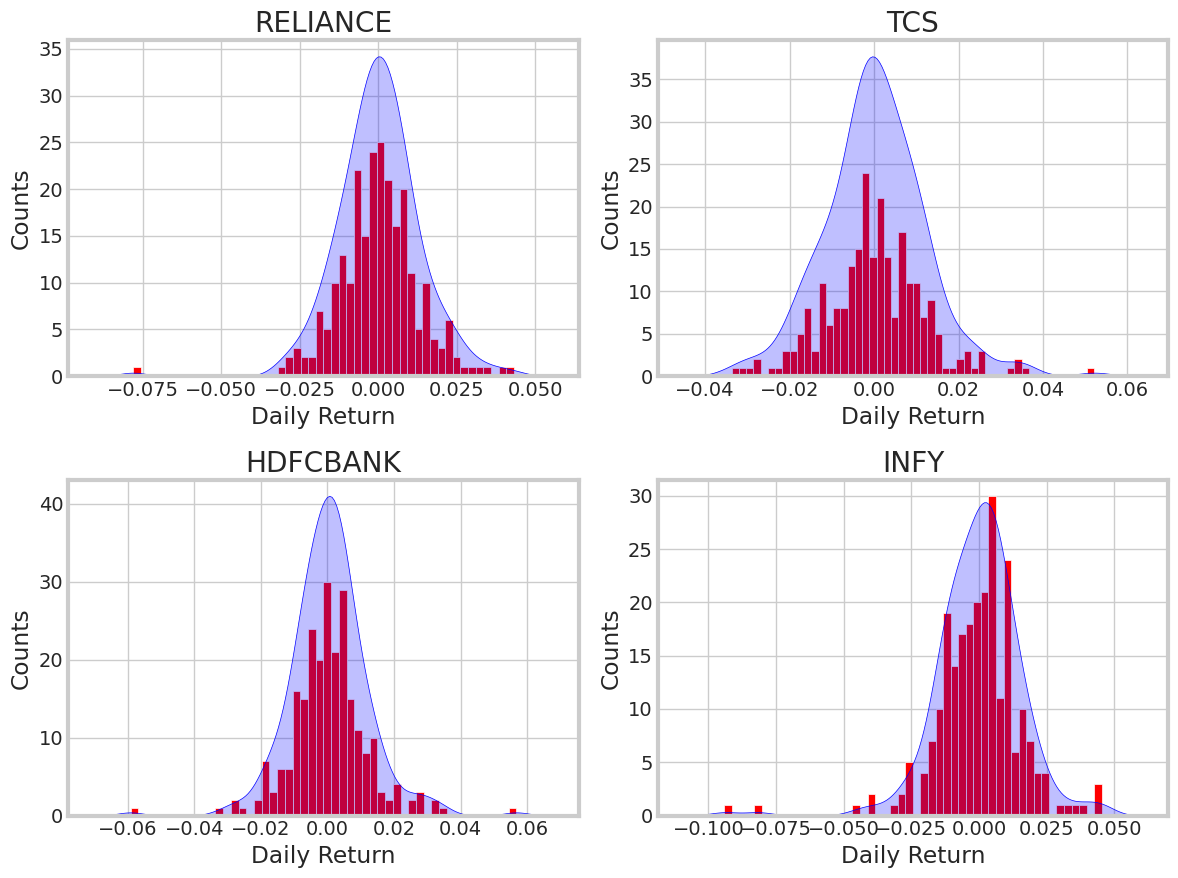

In [18]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50,color='Red')
    sns.kdeplot(company['Daily Return'],shade=True,color='blue')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

## 4. What was the **correlation** between different stocks closing prices?

*Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor.**

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [20]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(stock_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
stock_rets = closing_df.pct_change()
stock_rets.head()

[*********************100%%**********************]  4 of 4 completed


,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,
2022-08-22,NaN,NaN,NaN,NaN
2022-08-23,-0.003094,-0.021102,0.015422,-0.020852
2022-08-24,0.004810,-0.003177,-0.002664,-0.008905
2022-08-25,-0.005432,-0.012585,-0.002917,-0.011412
2022-08-26,0.000171,0.002240,-0.005338,0.001243


In [29]:
stock_rets.columns=['HDFC_Bank','Infosys','Reliance','TCS']

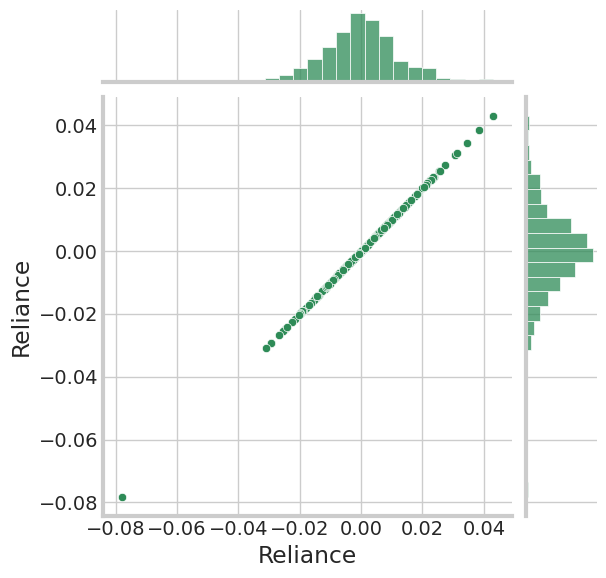

In [30]:
# Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

# Comparing Reliance Industries Limited to itself should show a perfectly linear relationship
sns.jointplot(x='Reliance', y='Reliance', data=stock_rets, kind='scatter', color='seagreen')

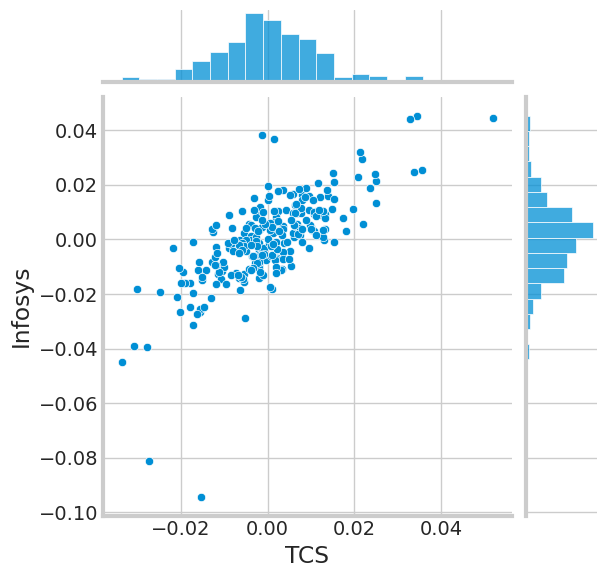

In [31]:
# We'll use joinplot to compare the daily returns of Reliance and Infosys
sns.jointplot(x='TCS', y='Infosys', data=stock_rets, kind='scatter')

**Observation:** So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

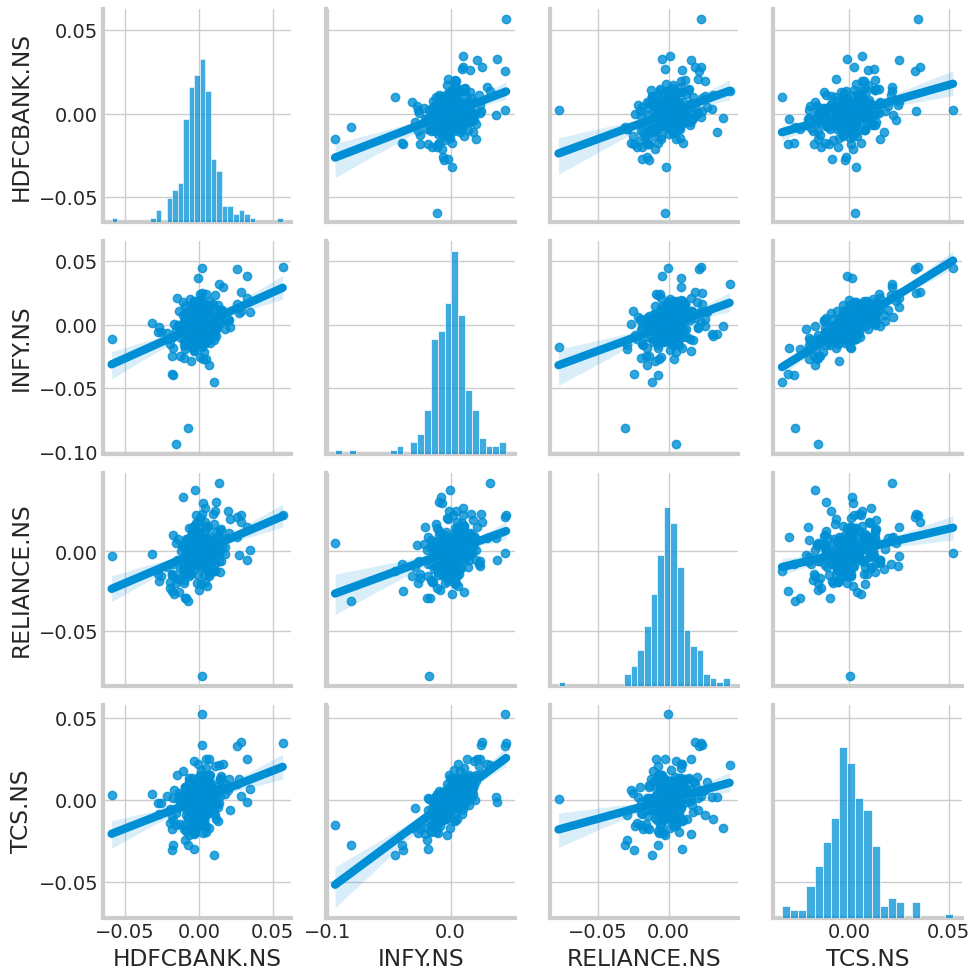

In [32]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(stock_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks.

**Observation:** A quick glance shows an interesting correlation between TCS and INFOSYS daily returns. It might be interesting to investigate that individual comaprison. Although there could be many possible factors for their high correlation, **one of the key factors could be that they work in a common sector.**



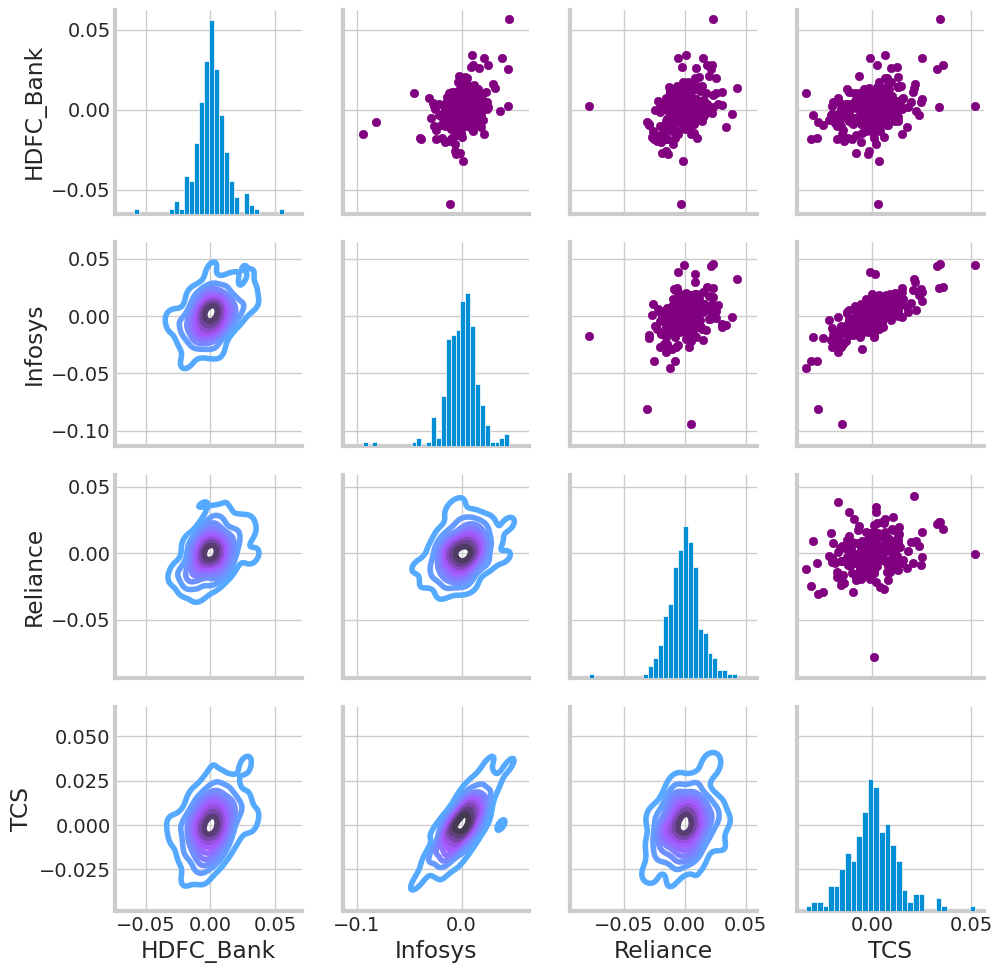

In [33]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

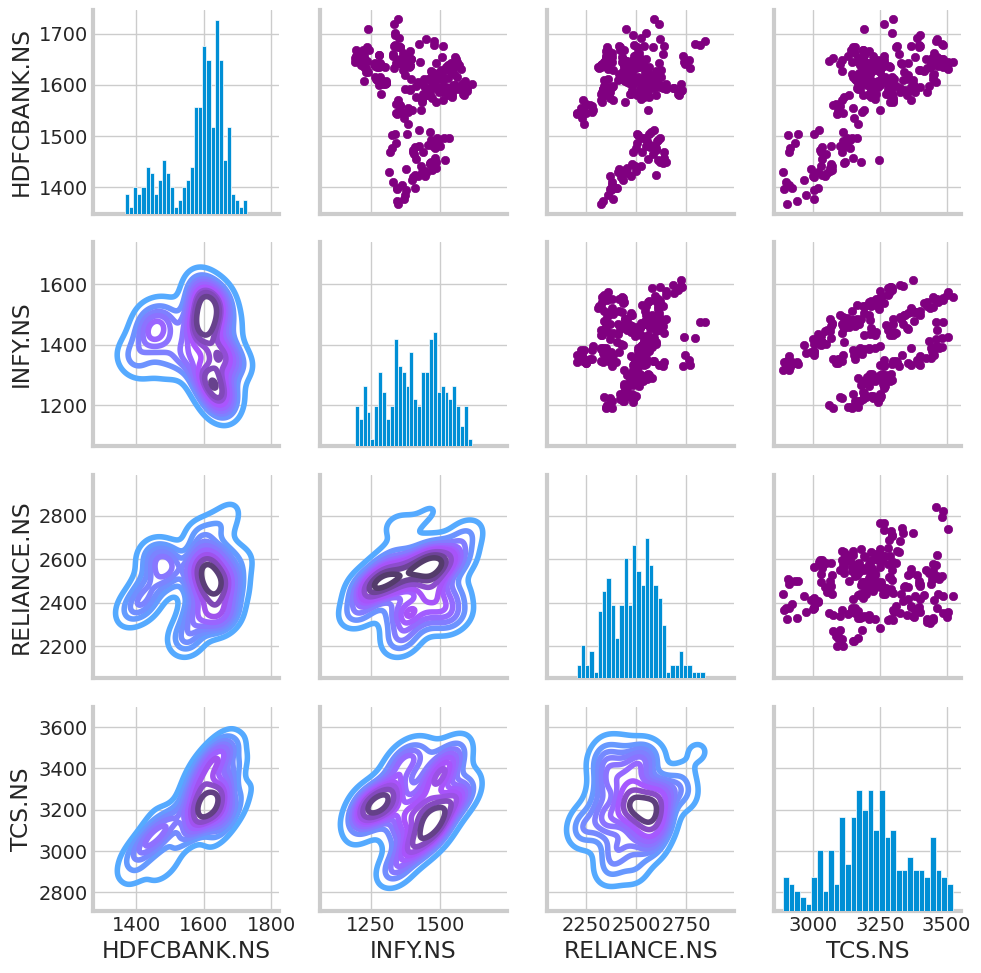

In [34]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between TCS and Infosys.

Text(0.5, 1.0, 'Correlation of stock closing price')

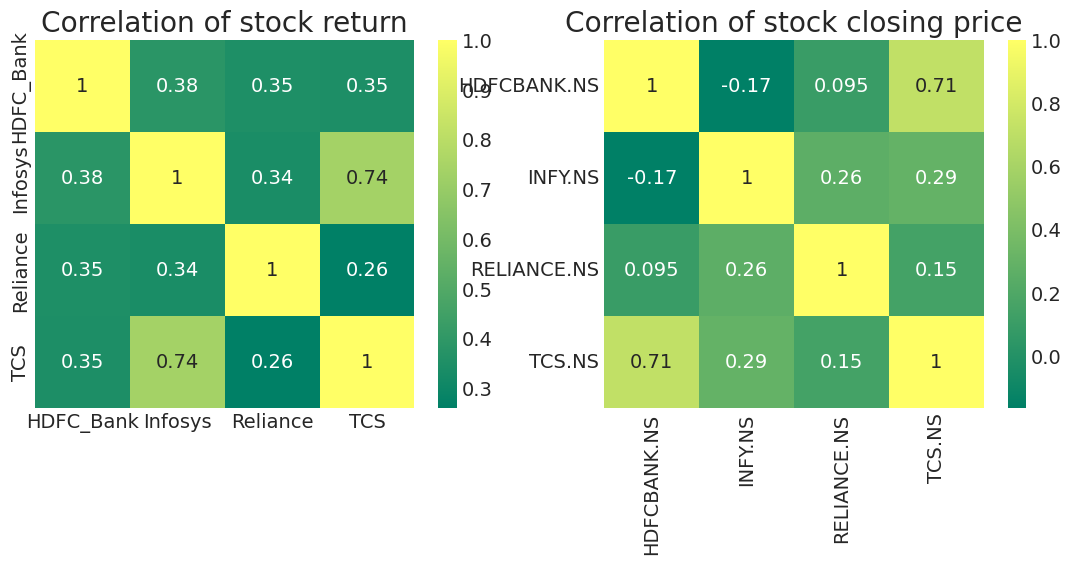

In [40]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our PairPlot we see here numerically and visually that TCS and Infosys had the strongest correlation of daily stock return. It's also interesting to see that although by a small amount, most of the comapnies are positively correlated.

## **5. How much value do we put at risk by investing in a particular stock?**
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

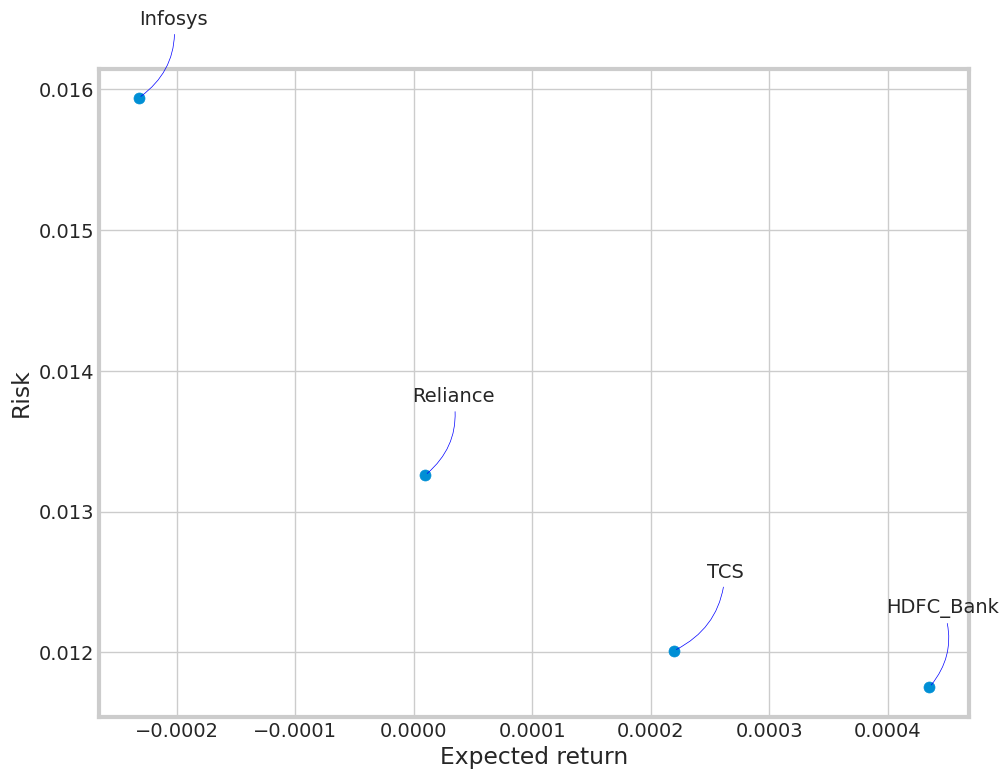

In [35]:
rets = stock_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [37]:
# Get the stock quote
df = pdr.get_data_yahoo('RELIANCE.NS', start='2009-01-01', end=datetime.now())
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,311.967865,321.923492,310.060944,318.580170,287.016113,20035581
2009-01-05,321.700592,341.017487,320.734741,338.256165,304.742676,22236678
2009-01-06,336.807404,344.236969,329.687378,339.506805,305.869446,24347018
2009-01-07,339.036285,343.246368,290.991699,297.368744,267.906281,34324506
2009-01-09,299.659515,299.659515,270.845154,285.605255,257.308258,38312271
...,...,...,...,...,...,...
2023-08-11,2532.449951,2558.850098,2512.350098,2547.149902,2547.149902,11089665
2023-08-14,2539.000000,2582.300049,2525.000000,2577.250000,2577.250000,4787906
2023-08-16,2551.000000,2582.800049,2551.000000,2575.149902,2575.149902,5101556


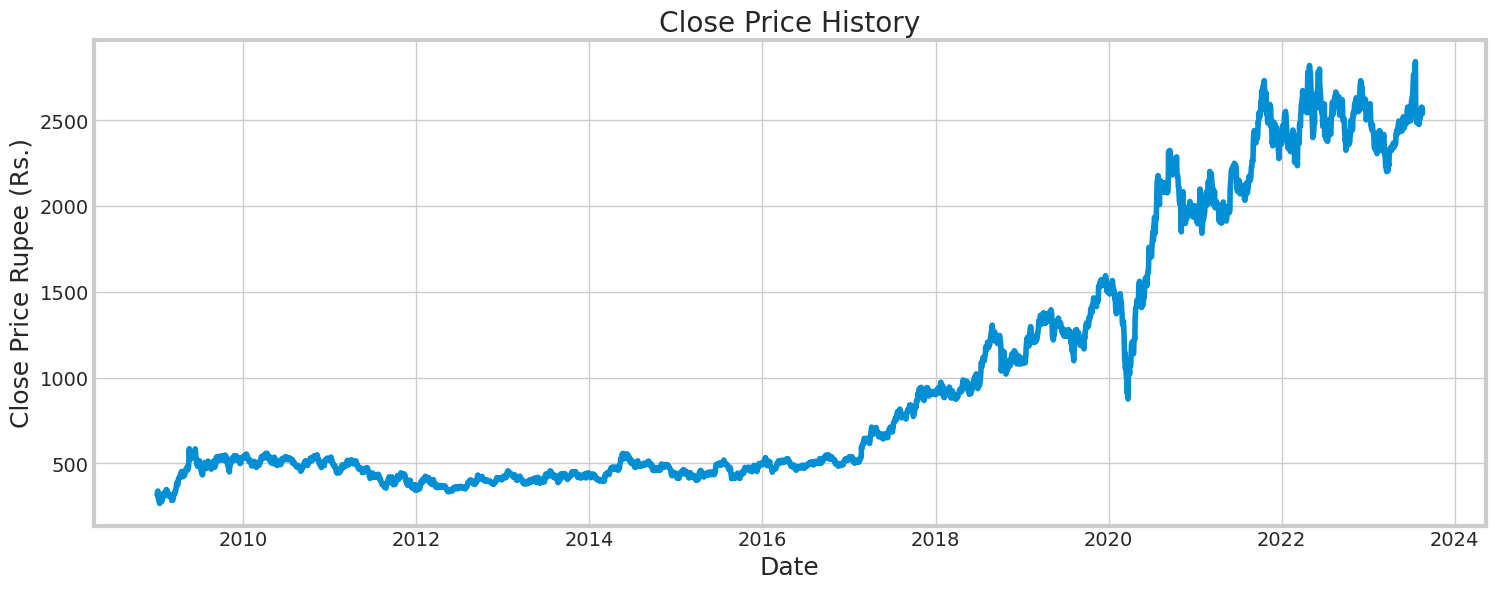

In [38]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupee (Rs.)', fontsize=18)
plt.show()

In [41]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3428

In [42]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02008636],
       [0.02772755],
       [0.02821324],
       ...,
       [0.89642679],
       [0.8819996 ],
       [0.88930061]])

In [43]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02008636, 0.02772755, 0.02821324, 0.01184889, 0.00728053,
       0.00195718, 0.        , 0.00982919, 0.00623221, 0.01344541,
       0.01465242, 0.01020428, 0.00406825, 0.00565034, 0.00755943,
       0.01427253, 0.01889378, 0.0185187 , 0.02366411, 0.01947084,
       0.02199065, 0.02211568, 0.02031718, 0.02570786, 0.03002135,
       0.0311995 , 0.02920866, 0.02635224, 0.03028102, 0.02333712,
       0.0182494 , 0.0209279 , 0.02079326, 0.01691256, 0.01689813,
       0.01817727, 0.02050955, 0.01812918, 0.01424367, 0.0114738 ,
       0.01284431, 0.00694873, 0.00888186, 0.00729014, 0.01196911,
       0.01987959, 0.02404881, 0.02141359, 0.02441429, 0.0257896 ,
       0.02516446, 0.03470993, 0.0360564 , 0.04372643, 0.04692909,
       0.04531815, 0.04221166, 0.04300992, 0.04844387, 0.05614756])]
[0.05713337050681959]

[array([0.02008636, 0.02772755, 0.02821324, 0.01184889, 0.00728053,
       0.00195718, 0.        , 0.00982919, 0.00623221, 0.01344541,
       0.01465242, 0.01020428, 0.00

In [44]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3368/3368 [==============================] - 76s 22ms/step - loss: 0.0014


In [45]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 1s 21ms/step


80.20450326717442

<ipython-input-46-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


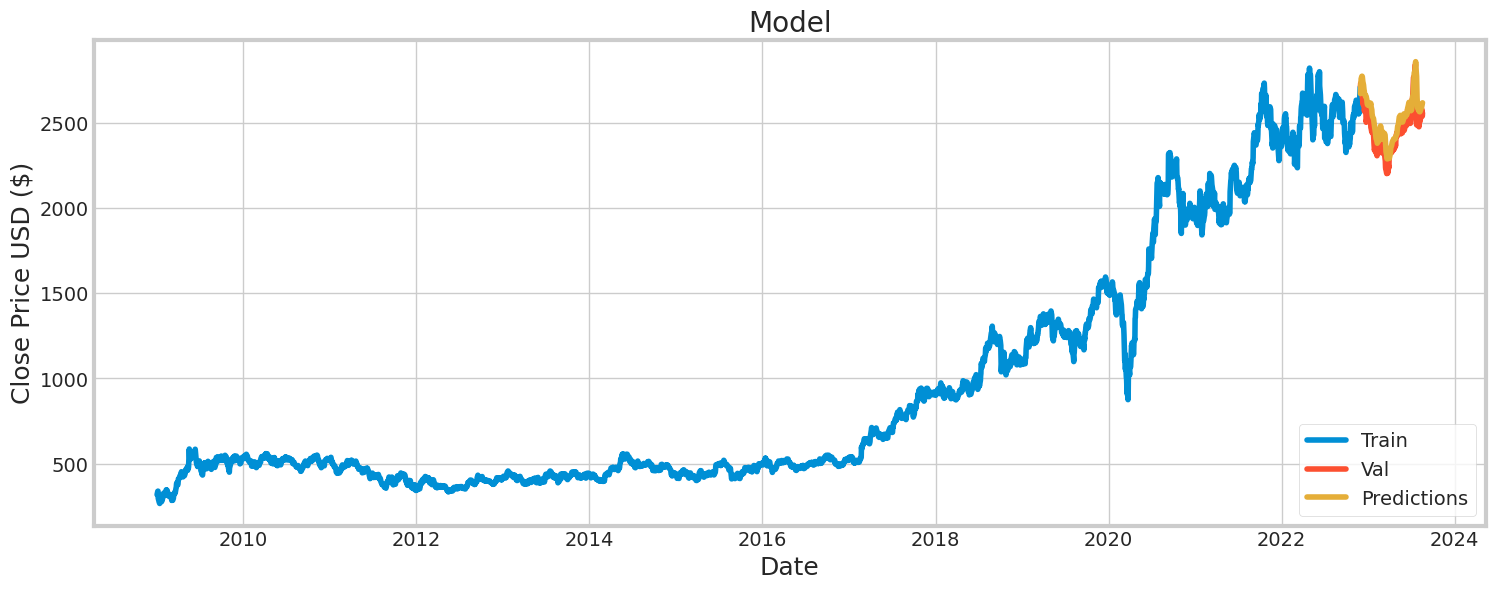

In [46]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [47]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-11-29,2712.199951,2670.303955
2022-11-30,2731.350098,2702.903320
2022-12-01,2723.300049,2734.420654
2022-12-02,2722.149902,2757.358154
2022-12-05,2682.449951,2772.149658
...,...,...
2023-08-11,2547.149902,2580.775879
2023-08-14,2577.250000,2589.200928
2023-08-16,2575.149902,2602.743164


In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(valid['Close'].values,valid['Predictions'].values)

0.6185060668278484

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr=LinearRegression()

In [1]:
X=df.drop('Close')

NameError: ignored

In [ ]:
y=df['Close']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split()

In [ ]:
lr.fit()